In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from mlxtend.frequent_patterns import apriori,association_rules

In [ ]:
b=pd.read_csv("book.csv")

In [ ]:
b.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
b.tail()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
b.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [ ]:
b.shape

(2000, 11)

In [ ]:
b.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [ ]:
b.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [ ]:
b.duplicated().sum()

1680

In [ ]:
b1=b.iloc[:,1:5]
b1.head()

,YouthBks,CookBks,DoItYBks,RefBks
0,1,0,1,0
1,0,0,0,0
2,0,0,0,0
3,1,1,0,1
4,0,1,0,0


In [ ]:
frequent_sets=apriori(b1,min_support=0.05,use_colnames=True)
frequent_sets['length']=frequent_sets['itemsets'].apply(lambda x : len(x))
frequent_sets

,support,itemsets,length
0,0.2475,(YouthBks),1
1,0.4310,(CookBks),1
2,0.2820,(DoItYBks),1
3,0.2145,(RefBks),1
4,0.1620,"(YouthBks, CookBks)",2
5,0.1155,"(DoItYBks, YouthBks)",2
6,0.0965,"(RefBks, YouthBks)",2
7,0.1875,"(DoItYBks, CookBks)",2
8,0.1525,"(RefBks, CookBks)",2
9,0.1055,"(DoItYBks, RefBks)",2


In [ ]:
rules=association_rules(frequent_sets,min_threshold=0.7)
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
1,"(DoItYBks, YouthBks)",(CookBks),0.1155,0.431,0.0950,0.822511,1.908378,0.045220,3.205829
2,"(YouthBks, RefBks)",(CookBks),0.0965,0.431,0.0775,0.803109,1.863362,0.035908,2.889921
3,"(DoItYBks, RefBks)",(CookBks),0.1055,0.431,0.0845,0.800948,1.858348,0.039030,2.858548


<function matplotlib.pyplot.show(*args, **kw)>

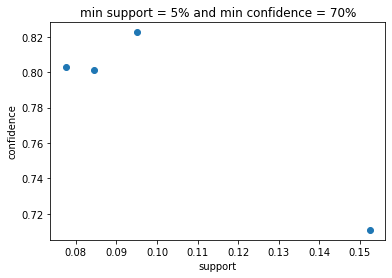

In [ ]:
plt.scatter('support','confidence',data=rules)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('min support = 5% and min confidence = 70%')
plt.show

#Creating Association rules with 5% support and 50% confidence

In [ ]:
frequent_sets=apriori(b1,min_support=0.05,use_colnames=True)
frequent_sets['length']=frequent_sets['itemsets'].apply(lambda x : len(x))
frequent_sets

,support,itemsets,length
0,0.2475,(YouthBks),1
1,0.4310,(CookBks),1
2,0.2820,(DoItYBks),1
3,0.2145,(RefBks),1
4,0.1620,"(YouthBks, CookBks)",2
5,0.1155,"(DoItYBks, YouthBks)",2
6,0.0965,"(RefBks, YouthBks)",2
7,0.1875,"(DoItYBks, CookBks)",2
8,0.1525,"(RefBks, CookBks)",2
9,0.1055,"(DoItYBks, RefBks)",2


In [ ]:
rules=association_rules(frequent_sets,min_threshold=0.5)
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
1,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
2,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
3,"(DoItYBks, YouthBks)",(CookBks),0.1155,0.4310,0.0950,0.822511,1.908378,0.045220,3.205829
4,"(DoItYBks, CookBks)",(YouthBks),0.1875,0.2475,0.0950,0.506667,2.047138,0.048594,1.525338
5,"(YouthBks, CookBks)",(DoItYBks),0.1620,0.2820,0.0950,0.586420,2.079503,0.049316,1.736060
6,"(YouthBks, RefBks)",(CookBks),0.0965,0.4310,0.0775,0.803109,1.863362,0.035908,2.889921
7,"(RefBks, CookBks)",(YouthBks),0.1525,0.2475,0.0775,0.508197,2.053320,0.039756,1.530083
8,"(DoItYBks, RefBks)",(YouthBks),0.1055,0.2475,0.0580,0.549763,2.221265,0.031889,1.671342
9,"(YouthBks, RefBks)",(DoItYBks),0.0965,0.2820,0.0580,0.601036,2.131334,0.030787,1.799662


<function matplotlib.pyplot.show(*args, **kw)>

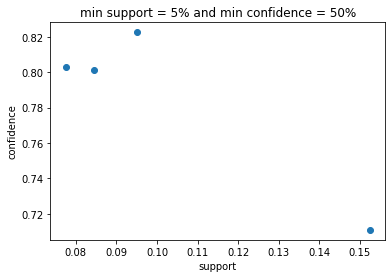

In [ ]:
plt.scatter('support','confidence',data=rules)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('min support = 5% and min confidence = 50%')
plt.show

#Creating Association rules with 10% support and 70% confidence

In [ ]:
frequent_sets1=apriori(b1,min_support=0.1,use_colnames=True)
frequent_sets1['len']=frequent_sets1['itemsets'].apply(lambda x : len(x))
frequent_sets1

,support,itemsets,len
0,0.2475,(YouthBks),1
1,0.4310,(CookBks),1
2,0.2820,(DoItYBks),1
3,0.2145,(RefBks),1
4,0.1620,"(YouthBks, CookBks)",2
5,0.1155,"(DoItYBks, YouthBks)",2
6,0.1875,"(DoItYBks, CookBks)",2
7,0.1525,"(RefBks, CookBks)",2
8,0.1055,"(DoItYBks, RefBks)",2


In [ ]:
rules1=association_rules(frequent_sets1,min_threshold=0.7)
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.06005,1.968556


<function matplotlib.pyplot.show(*args, **kw)>

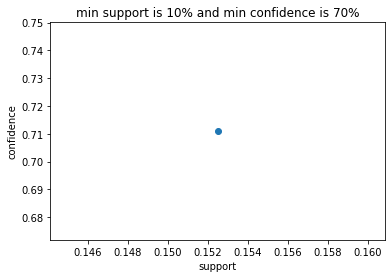

In [ ]:
plt.scatter('support','confidence',data=rules1)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('min support is 10% and min confidence is 70%')
plt.show

#Creating Association rules with 20% support and 55% confidence

In [ ]:
frequent_sets2=apriori(b1,min_support=0.2,use_colnames=True)
frequent_sets2['len']=frequent_sets2['itemsets'].apply(lambda x : len(x))
frequent_sets2

,support,itemsets,len
0,0.2475,(YouthBks),1
1,0.4310,(CookBks),1
2,0.2820,(DoItYBks),1
3,0.2145,(RefBks),1


In [ ]:
rules2=association_rules(frequent_sets2,min_threshold=0.55)
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


<function matplotlib.pyplot.show(*args, **kw)>

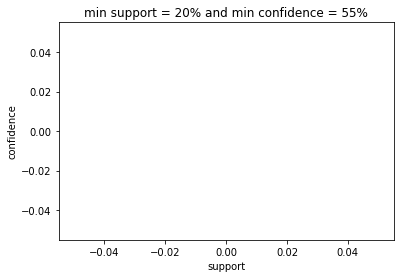

In [ ]:
plt.scatter('support','confidence',data=rules2)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('min support = 20% and min confidence = 55%')
plt.show